In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate']).view('int64')//10**9

In [5]:
customer_trans = transactions.groupby('CustomerID').agg({
    'TotalValue':['sum','mean'],
    'TransactionID':'count'
}).reset_index()

In [7]:
customer_trans.columns = ['CustomerID','total_spending','avg_transaction_value','total_transactions']

In [10]:
data = customers.merge(customer_trans, on='CustomerID',how='left').fillna(0)

In [9]:
data

,CustomerID,CustomerName,Region,SignupDate,total_spending,avg_transaction_value,total_transactions
0,C0001,Lawrence Carroll,South America,1657411200,3354.52,670.904000,5.0
1,C0002,Elizabeth Lutz,Asia,1644710400,1862.74,465.685000,4.0
2,C0003,Michael Rivera,South America,1709769600,2725.38,681.345000,4.0
3,C0004,Kathleen Rodriguez,South America,1665273600,5354.88,669.360000,8.0
4,C0005,Laura Weber,Asia,1660521600,2034.24,678.080000,3.0
...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,1654560000,4982.88,1245.720000,4.0
196,C0197,Christina Harvey,Europe,1679356800,1928.65,642.883333,3.0
197,C0198,Rebecca Ray,Europe,1645920000,931.83,465.915000,2.0
198,C0199,Andrea Jenkins,Europe,1670025600,1979.28,494.820000,4.0


In [14]:
features = ['total_spending','avg_transaction_value','total_transactions','SignupDate']

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

In [16]:
inertia=[]
db_scores = []
silhouette_scores = []
K = range(2,11)

In [19]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(data_scaled, labels))
    silhouette_scores.append(silhouette_score(data_scaled, labels))

C:\Users\rajag\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajag\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajag\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajag\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

Text(0.5, 1.0, 'Elbow Method')

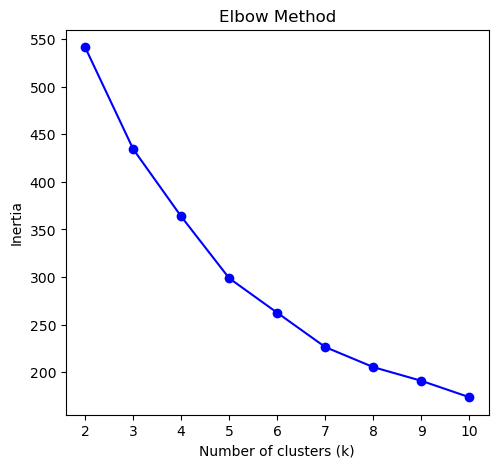

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

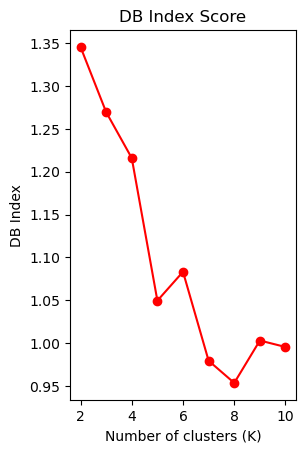

In [21]:
plt.subplot(1,2,2)
plt.plot(K, db_scores,'ro-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('DB Index')
plt.title('DB Index Score')
plt.show()

In [22]:
best_k = K[np.argmin(db_scores)]
print(f"Best K: {best_k} with DB Index: {min(db_scores)}")

Best K: 8 with DB Index: 0.9533703528805757


In [25]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)
labels = kmeans.fit_predict(data_scaled)
silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Silhouette Score for K={best_k}: {silhouette_avg:.4f}")

C:\Users\rajag\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajag\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for K=8: 0.3210


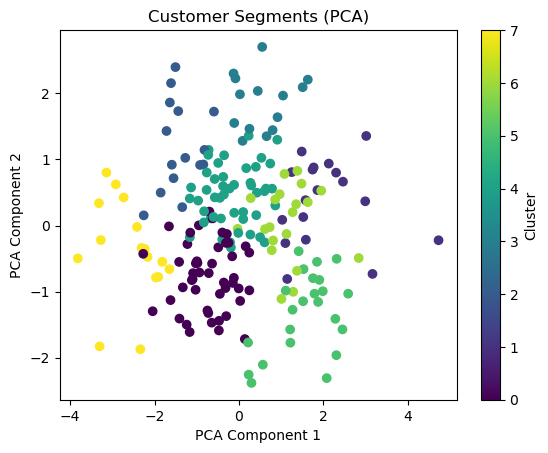

In [24]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
plt.scatter(pca_data[:,0], pca_data[:,1], c=data['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments (PCA)')
plt.colorbar(label='Cluster')
plt.show()

In [27]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia:.4f}")

Inertia: 205.2791
